In [54]:
# Import Necessary Libraries
import pyforest

In [56]:
# Load the Dataset
data = pd.read_csv('data.csv')

In [57]:
# Explore the Dataset
data.head()

,CustomerID,Name,Gender,Age,Location,Tenure,MonthlyCharges,DataUsage,VoiceMinutes,TextMessages,ServicePlan,BillingAmount,PaymentMethod,LatePayments,CustomerSupportCalls,Complaints,Churn
0,1,Gordon Garforth,Polygender,27,Hradec Králové,4,69.71,0.7,979,103,Contract,2528,Auto Pay,0,2,5,True
1,2,Sasha Drei,Female,30,Przewóz,56,23.26,5.3,210,269,Prepaid,3907,Bank Transfer,2,4,4,True
2,3,Megan Teml,Female,78,Sovetskaya,60,65.76,4.0,36,157,Contract,2608,Auto Pay,0,0,1,False
3,4,Patrizio Waltering,Male,83,Kliteh,60,4.70,8.2,812,94,Prepaid,3881,Bank Transfer,2,4,3,True
4,5,Latrena Dampney,Female,80,Devitsa,7,57.38,6.6,823,431,Contract,3147,Credit Card,3,2,5,False


In [107]:
# Check the shape of the Dataset
data.shape

(1000, 2000)

In [108]:
# Data Cleaning
data.dropna(inplace=True)

data = pd.get_dummies(data, drop_first=True)

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Complaints'] = scaler.fit_transform(data[['Complaints']])

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn', axis=1), data['Churn'], test_size=0.2, random_state=42)


# Initialize and train xgboost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)


# Predict churn on the test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

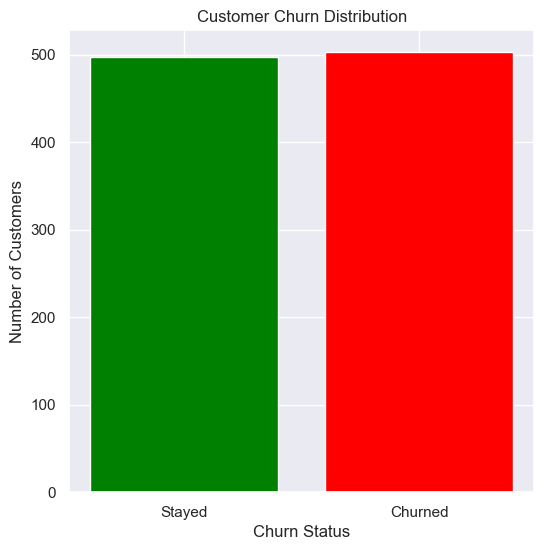

In [121]:
# VISUALIZE DATA

data = pd.read_csv('data.csv')

# Count the number of customers who churned and those who stayed
churn_counts = data['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['red', 'green'])
plt.xticks(churn_counts.index, ['Churned', 'Stayed'])
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')
plt.show()


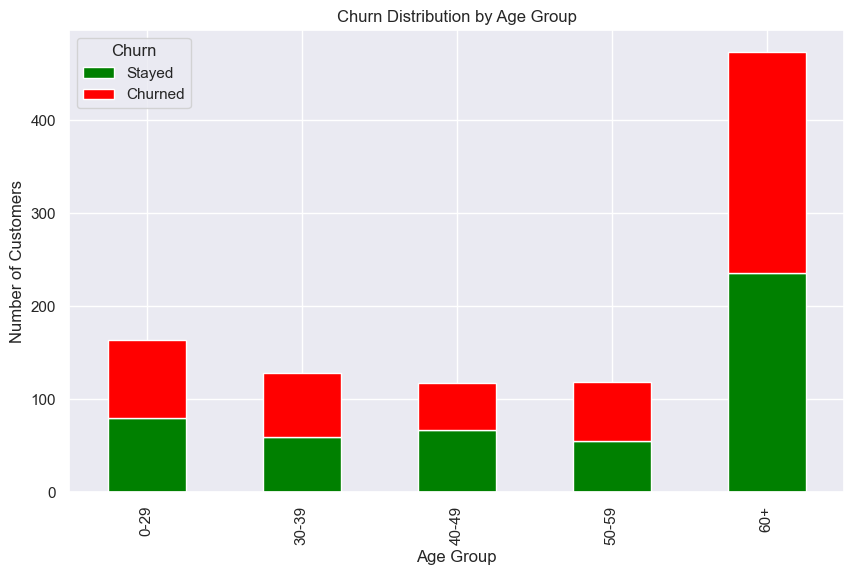

In [125]:
# VISUALIZE CHURN BY AGE GROUP

# Create age groups
age_bins = [0, 30, 40, 50, 60, 100]  # Define age bins
age_labels = ['0-29', '30-39', '40-49', '50-59', '60+']  # Labels for age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Count the number of customers who churned and those who stayed within each age group
# churn_counts = data.groupby(['AgeGroup', 'Churn'])['CustomerID'].count().unstack()

# create a cross-tabulation table of churn by age group
churn_counts = pd.crosstab(data['AgeGroup'], data['Churn'], dropna=False)

# Create a stacked bar chart to visualize churn by age group
churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Churn Distribution by Age Group')
plt.legend(title='Churn', labels=['Stayed', 'Churned'])
plt.show()
